In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Courbe de taux par Bank Al Maghrib

In [78]:
taux_bkam = pd.read_excel("C:/Users/Yazid/Desktop/Pricing/doc4.xlsx")
taux_bkam = taux_bkam.set_index("Date d'échéance")
taux_bkam["Nombre de jours"] = 0

In [102]:
for i in range(len(taux_bkam.index)):
    taux_bkam["Nombre de jours"].iloc[i] = (taux_bkam.index[i]-taux_bkam["Date de la valeur"][i]).days
taux_bkam

,Transaction,Taux,Date de la valeur,Nombre de jours
Date d'échéance,,,,
2020-09-05,21.02,0.01534,2020-07-21,46
2020-09-14,89.47,0.01540,2020-07-20,56
2020-12-07,61.48,0.01590,2020-07-23,137
2021-02-15,27.76,0.01574,2020-07-23,207
2021-05-17,282.82,0.01635,2020-07-23,298
2022-07-18,124.58,0.01798,2020-07-23,725
2022-08-15,124.53,0.01805,2020-07-23,753
2023-04-03,103.35,0.01840,2020-07-23,984
2025-04-14,247.36,0.02009,2020-07-23,1726


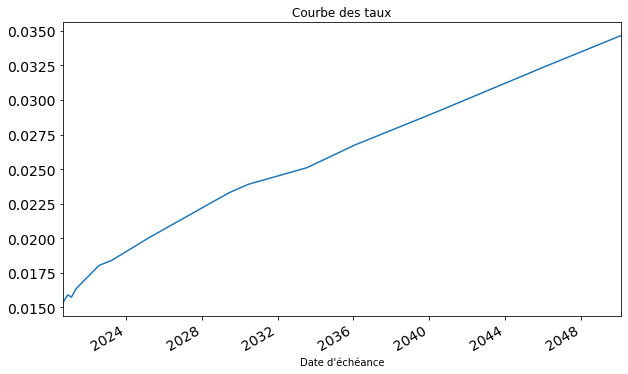

In [80]:
taux_bkam["Taux"].plot(figsize=(10,6), fontsize=14, title = "Courbe des taux")

### Interpolation pour trouver le rendement entre deux dates

In [81]:
from datetime import date, datetime

def date_str2date(date0): #format "22-11-2020"
    d = date0.split("-")
    day = int(d[0])
    month = int(d[1])
    year = int(d[2])
    return datetime(year,month,day)  

def date_date2str(date0):
    return str(date0.day)+"-"+str(date0.month)+"-"+str(date0.year)
    

def date_apres(maturite):
    maturite = date_str2date(maturite)
    i=0
    while (maturite-taux_bkam.index[i]).days>0:
        i+=1
    return taux_bkam.index[i]

def date_avant(maturite):
    maturite = date_str2date(maturite)
    i=taux_bkam.shape[0]-1
    while (maturite-taux_bkam.index[i]).days<0:
        i-=1
    return taux_bkam.index[i]

In [82]:
def interp_l(mat):
    
    t1 = date_avant(mat)
    t2 = date_apres(mat)
    
    maturite = date_str2date(mat)
    a = ((t2-maturite).days)*taux_bkam.loc[t1]["Taux"]
    b = ((maturite-t1).days)*taux_bkam.loc[t2]["Taux"]
    dt = (t2 - t1).days
    
    return (a+b)/dt

# Taux annuels par interpolation

In [83]:
from datetime import timedelta

def add_time(date, jours=0, mois=0, ans=0):
    """
    format de la date : jj/mm/aaaa
    """
    return date_str2date(date) + timedelta(days=(jours + mois*30 + ans*360))

In [84]:
def somme(periode):
    s = np.array((1+taux.loc[periode]["Taux référence"])**(-taux.index))[:periode-1].sum() - np.array((1+taux.loc[:periode-1]["Taux ZC"])**(-taux.index[:periode-1])).sum()
    return s


In [85]:
def taux_zc(periode):
    if periode ==1:
        return taux.loc[1]["Taux référence"]
    return (somme(periode) + (1+taux.loc[periode]["Taux référence"])**(-periode))**(-1/periode) - 1

In [86]:
nb_ans = 30
taux = pd.DataFrame(index = np.arange(1,nb_ans+1), columns=["Maturité","Taux référence","Taux ZC"])

date_str = "17-7-2020"
date_eval = date_str2date(date_str)

taux.loc[nb_ans]["Maturité"] = str(nb_ans) + " ans"
taux.loc[nb_ans]["Taux référence"] = taux_bkam.iloc[-1]["Taux"]  

taux.loc[1]["Taux ZC"] = taux.loc[1]["Taux référence"] = interp_l(date_date2str(add_time(date_str,ans = 1)))

for i in range(1,nb_ans+1):
    taux.loc[i]["Maturité"] = str(i) + " ans"
    taux.loc[i]["Taux référence"] = interp_l(date_date2str(add_time(date_str,ans = i)))
    taux.loc[i]["Taux ZC"] = taux_zc(i)

In [87]:
taux["Taux référence"] = taux["Taux référence"].astype('float32')

In [88]:
taux

,Maturité,Taux référence,Taux ZC
1,1 ans,0.016564,0.0165638
2,2 ans,0.017938,0.0186391
3,3 ans,0.018605,0.0192901
4,4 ans,0.019425,0.0207007
5,5 ans,0.020230,0.0219176
6,6 ans,0.020990,0.0230028
7,7 ans,0.021750,0.0241946
8,8 ans,0.022510,0.0253994
9,9 ans,0.023262,0.0265742
10,10 ans,0.023864,0.0268725


# Obligations
### Générer les cashflows d'une obligation

In [89]:
def obligation_cashflows(maturite, coupons_par_an, taux_facial = 0.03, principal = 1000, amortissable = False):
    #nombre de coupons versés par an
    n_coupons = maturite*coupons_par_an
    #dates de versement des coupons
    dates_coupon = np.arange(1,n_coupons+1)
    
    if isinstance(taux_facial, float):
        if amortissable :
            amortissement = principal/maturite
            reste = principal
            cashflows = pd.Series(index = dates_coupon)
            for i in dates_coupon :
                montant_coupon = reste * taux_facial/coupons_par_an + amortissement
                reste -= amortissement
                cashflows.loc[i] = montant_coupon
        else :
            #montant du coupon
            montant_coupon = principal * taux_facial/coupons_par_an
            cashflows = pd.Series(data = montant_coupon, index = dates_coupon)
            #remboursement du principal
            cashflows.iloc[-1] += principal
            
    else:
        if amortissable :
            amortissement = principal/n_coupons
            reste = principal
            cashflows = pd.Series(index = dates_coupon)
            for i in dates_coupon :
                montant_coupon = reste * taux_facial[i-1]/coupons_par_an + amortissement
                reste = reste - amortissement
                cashflows.iloc[i-1] = montant_coupon
        else :
            #montant du coupon
            cashflows = pd.Series(index = dates_coupon)
            for i in dates_coupon :
                montant_coupon = principal * taux_facial[i-1]/coupons_par_an
                cashflows.iloc[i-1] = montant_coupon
            #remboursement du principal
            cashflows.iloc[-1] += principal
    return cashflows

In [90]:
obligation_cashflows(maturite=4, coupons_par_an=1, principal = 100000, 
                     taux_facial = [0.02,0.03, 0.04, 0.03], amortissable = False)

1      2000.0
2      3000.0
3      4000.0
4    103000.0
dtype: float64

In [91]:
obligation_cashflows(maturite=4, coupons_par_an=1, principal = 100000, taux_facial = 0.04, amortissable = True)

1    29000.0
2    28000.0
3    27000.0
4    26000.0
dtype: float64

### Actualiser une valeur à un taux de rendement actuariel à une période t

In [92]:
def actualiser(valeur, taux_rendement, t):
    return valeur*(1+taux_rendement)**-(t)

### Calculer la valeur actualisée des cashflows d'une obligation à taux variable/fixe

In [93]:
def pv_cashflows(cashflows, taux_rendement):
    L = []
    if isinstance(taux_rendement, float):
        for i in range(len(cashflows.index)):
            L.append(actualiser(cashflows.iloc[i],taux_rendement,i+1))
    
    else:
        if len(cashflows)!=len(taux_rendement):
            raise TypeError("Les listes cashflows et taux_actu doivent être de la même taille")
        i=0
        for t in taux_rendement:
            L.append(actualiser(cashflows.iloc[i],t,i+1))
            i+=1
    return np.array(L).sum()

In [94]:
#application
taux_facial_fixe = 0.02
taux_facial_variable = [0.02, 0.02, 0.02]
taux_rendement = [0.02,0.02, 0.02]
cf_fixe = obligation_cashflows(maturite = 3, coupons_par_an = 1, principal = 1000, 
                               taux_facial = taux_facial_fixe , amortissable=False)
cf_v = obligation_cashflows(maturite = 3, coupons_par_an = 1, principal = 1000, 
                            taux_facial = taux_facial_variable , amortissable=False)

pv_cashflows(cf_v, taux_rendement), pv_cashflows(cf_fixe, taux_rendement)

(1000.0, 1000.0)

In [103]:
cf = obligation_cashflows(maturite = 10, coupons_par_an = 1, principal = 100, 
                               taux_facial = 0.04 , amortissable=False)
pv_cashflows(cf, 0.03)

108.5302028367758

In [104]:
tra = np.linspace(0,0.15,20) #Taux de rendement actuariel
prix_obligation = []
for t in range(len(tra)):
    prix_obligation.append(pv_cashflows(cf,tra[t]))

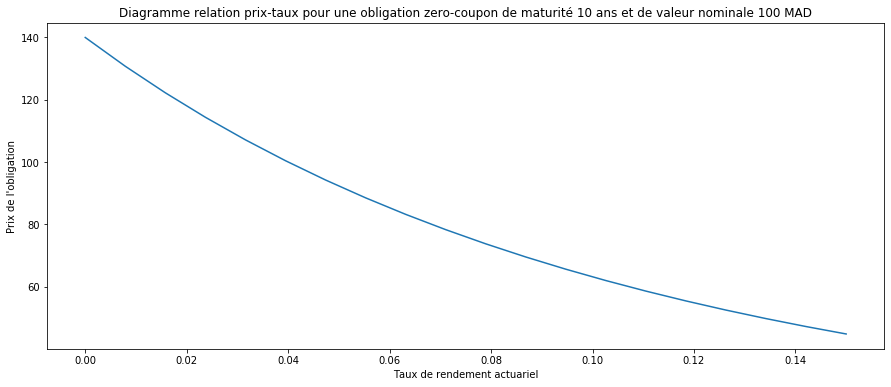

In [105]:
plt.figure(figsize=(15,6))
plt.xlabel("Taux de rendement actuariel")
plt.ylabel("Prix de l'obligation")
plt.title("Diagramme relation prix-taux pour une obligation zero-coupon de maturité 10 ans et de valeur nominale 100 MAD",loc='center')
plt.plot(tra,prix_obligation)

# Pricing obligation

In [106]:
def pricing_obligation(maturite, coupons_par_an, taux_facial = 0.03, tra = 0.03, principal = 1000, amortissable = False):
    cashflows = obligation_cashflows(maturite, coupons_par_an, taux_facial, principal, amortissable)
    return pv_cashflows(cashflows,tra)

In [107]:
pricing_obligation(maturite = 8, coupons_par_an = 2, taux_facial = 0.05, tra=0.03, principal = 1000, amortissable=False)

937.1944898700186